# Matrix Math from Octave compared with Numpy

## 2 Dimensional Array (Regular Matrices)

### Octave

x=[1,2,3; 4,5,6; 7,8,9]

y=[10,11,12; 13,14,15; 16,17,18]

x*y=[84,90,96; 201,216,231; 318,342,366]

### Numpy

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
x=np.array([[1,2,3], [4,5,6], [7,8,9]])

In [20]:
y=np.array([[10,11,12], [13,14,15], [16,17,18]])

In [23]:
np.matmul(x,y)

array([[ 84,  90,  96],
       [201, 216, 231],
       [318, 342, 366]])

## 1 Dimensional Array (Vectors)

### Octave

x1=[1,2,3,4,5]

x2=[1; 2; 3; 4; 5]

x2*x1=[1,2,3,4,5; 2,4,6,8,10; 3,6,9,12,15 ; 4,8,12,16,20; 5,10,15,20,25]

### Numpy

In [24]:
x1=np.array([1,2,3,4,5])

In [31]:
x1.shape

(5,)

We already encountered problems here. What I would think is a 1x5 vector was actually made as a 5x(nothing??)

In [32]:
x1.reshape(1,5)

array([[1, 2, 3, 4, 5]])

After using the **reshape** function, I'll try and create my vector again with this format

In [33]:
x1_2=np.array([[1,2,3,4,5]])

In [34]:
x1_2.shape

(1, 5)

And it did work. Now let's try the x2 vector.

In [35]:
x2=np.array([[1],[2],[3],[4],[5]])

In [36]:
x2.shape

(5, 1)

First try and it worked. Now let's do the matrix creation test.

In [37]:
np.matmul(x2,x1_2)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

That worked great.

# Difference between [[1]] and [1]

Now what's bothering me is the difference between the array created before the reshaping and after. Let's try to figure it out.

In [38]:
t=np.array([1,2,3,4,5])

In [39]:
u=np.array([[1,2,3,4,5]])

They appear to be very similar. Let's check out the shape. 

In [41]:
t.shape

(5,)

In [42]:
u.shape

(1, 5)

They are very different. Why numpy considers a simple array as having only one dimension and why the numbers are arranged in the "rows" instead of "columns"??? 

But it becomes more weird:

In [43]:
t == u

array([[ True,  True,  True,  True,  True]])

Why the fuck a comparison renders all the elements as the same??

And again it becomes more weird:

In [52]:
x1.shape

(5,)

In [53]:
x2.shape

(5, 1)

In [51]:
x1 == x2

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False],
       [False, False, False,  True, False],
       [False, False, False, False,  True]])

Wuuut.......???

Maybe comparisons like these doen't make sense in python/numpy

Trying again with the **array_equal** function

In [54]:
np.array_equal(x1,x2)

False

In [55]:
np.array_equal(x1.reshape(5,1),x2)

True

In [56]:
x1.reshape(5,1) == x2

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True]])

The problem is that I don't know exacly what the problem is...

## 1D vs. 2D

The difference is that I'm thinking about linear algebra, which most of the applications are in 2 or 3 dimensional space. 

The first vector (x1) is a 1D vector, which can be represented on a line. The second vector (x1_2) is a two dimensional vector, which can be represented on a plane(?)

In [57]:
x1.ndim

1

In [58]:
x1_2.ndim

2

Now the question becomes, how a five element vector belongs to R2?

# Geometrical View of Vectors

In [37]:
i=np.array([[1, 0]])
j=np.array([[0, 1]])

In [38]:
a=np.array([[5, 3]])

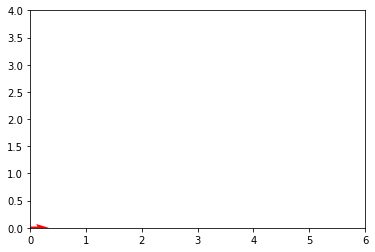

In [62]:
ax=plt.subplot()
ax.set(xlim=[0,6], ylim=[0,4])
ax.quiver(np.array([1]), np.array([0]), color='red')

(-5.0, 5.0)

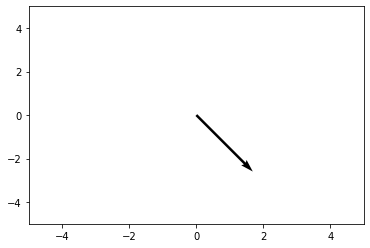

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# X = np.array((0))
# Y= np.array((0))
# U = np.array((2))
# V = np.array((-2))

fig, ax = plt.subplots()
q = ax.quiver(0, 0, 2, -2,units='xy' ,scale=1)

# plt.grid()

# ax.set_aspect('equal')

plt.xlim(-5,5)
plt.ylim(-5,5)

# Geometrical View of Vectors

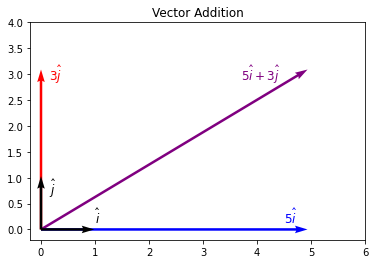

In [45]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Creating plot
ax=plt.subplot()

v1=np.array([[1], [0]])
v2=np.array([[0], [1]])

v3=5*v1
v4=3*v2

v5=v3+v4

origin=[[0], [0]]
ax.quiver(*origin, *v3, color='blue', units='xy', scale=1)
ax.quiver(*origin, *v4, color='red', units='xy', scale=1)
ax.quiver(*origin, *v5, color='purple', units='xy', scale=1)
ax.quiver(*origin, *v1, color='black', units='xy', scale=1)
ax.quiver(*origin, *v2, color='black', units='xy', scale=1)

# ax.plot([0, 5], [3, 3], 'k--')
# ax.plot([5, 5], [0, 3], 'k--')

plt.text(1, 0.15, r'$\hat{i}$', fontsize=12)
plt.text(0.15, 0.7, r'$\hat{j}$', fontsize=12)
plt.text(4.5, 0.15, r'$5\hat{i}$', fontsize=12, color='blue')
plt.text(0.15, 2.9, r'$3\hat{j}$', fontsize=12, color='red')
plt.text(3.7, 2.9, r'$5\hat{i}+3\hat{j}$', fontsize=12, color='purple')

plt.title('Vector Addition')
plt.xlim(-0.2, 6)
plt.ylim(-0.2, 4)
# Show plot with grid
ax.set_axisbelow(True)
# plt.grid()
plt.savefig('VectorAddition.png', transparent='True')